In [4]:
import numpy as np
import pandas as pd
import piplite
await piplite.install('seaborn')
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('Housing.csv')

In [23]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 40.5+ KB


In [25]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [26]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [39]:
for col in data:
    null_values = data[col].isnull().sum()
    print(f"{col}: {null_values}%")

price: 0%
area: 0%
bedrooms: 0%
bathrooms: 0%
stories: 0%
mainroad: 0%
guestroom: 0%
basement: 0%
hotwaterheating: 0%
airconditioning: 0%
parking: 0%
prefarea: 0%
furnishingstatus: 0%


In [40]:
duplicates = data.duplicated().sum()
print(f"Their are {duplicates} duplicates in the dataset.")

Their are 0 duplicates in the dataset.


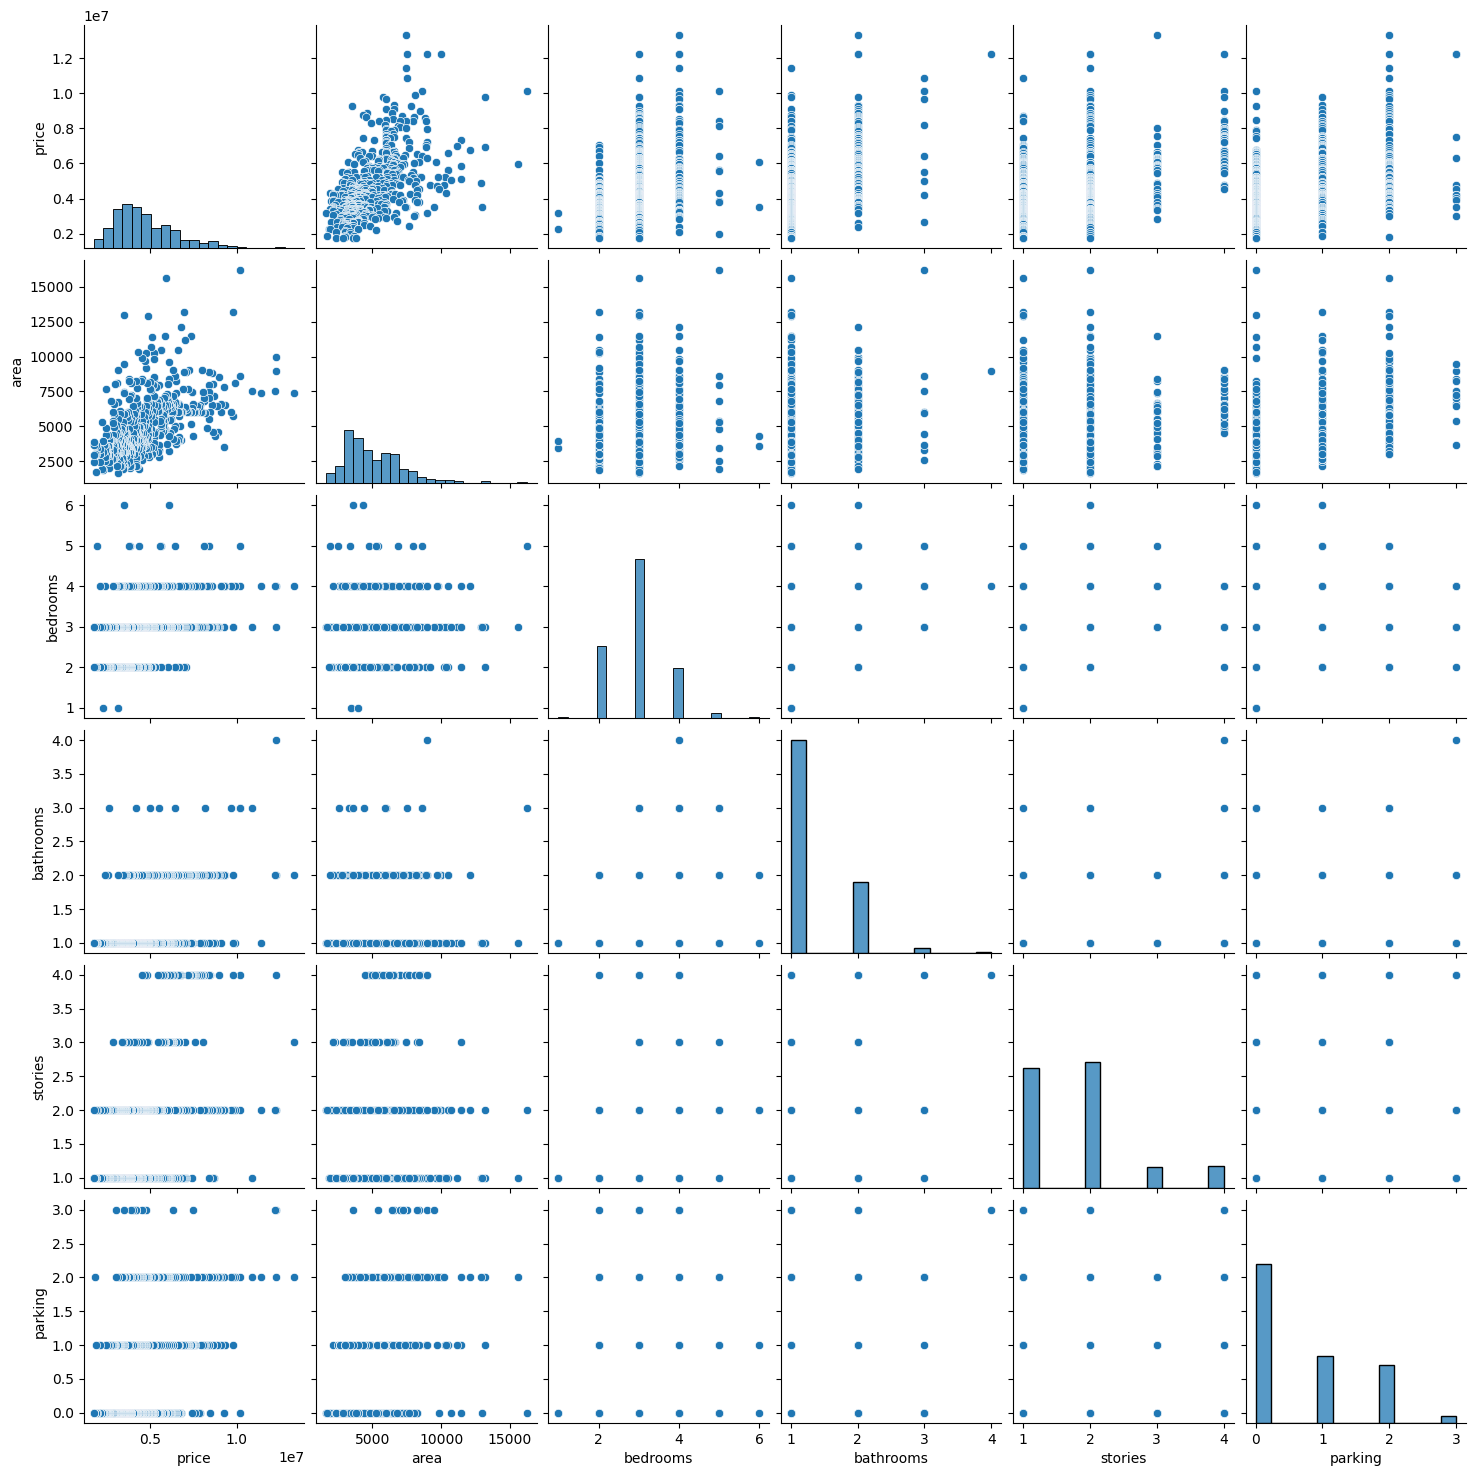

In [41]:
sns.pairplot(data)

<ipython-input-42-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot:>

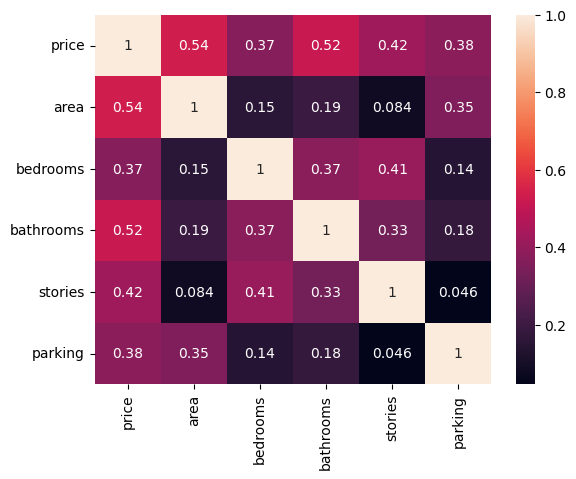

In [42]:
sns.heatmap(data.corr(), annot=True)

In [53]:
categorical_future_mask = data.dtypes==object

# Filter catergorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_future_mask].tolist()

# Instantiating a labelEncoder class
le = LabelEncoder()

# Apply le on catergorical feature columns 
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))

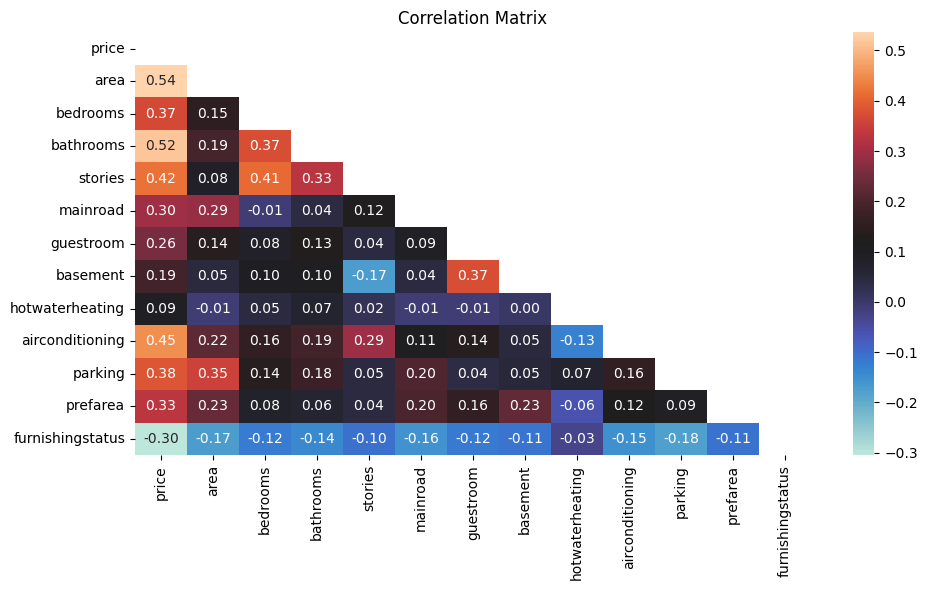

In [55]:
corr = data.corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [49]:
X = data["area"].values.reshape(-1,1)
y = data["price"].values


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=1)

In [33]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
375,5960,3,1,2,yes,yes,yes,no,no,0,no,unfurnished
187,6100,3,1,1,yes,no,yes,no,yes,0,yes,semi-furnished
109,6615,4,2,2,yes,yes,no,yes,no,1,no,semi-furnished
454,4500,3,1,2,yes,no,no,no,yes,0,no,unfurnished
382,3150,3,1,2,yes,no,yes,no,no,0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
316,5900,4,2,2,no,no,yes,no,no,1,no,unfurnished
393,7424,3,1,1,no,no,no,no,no,0,no,unfurnished
75,4260,4,2,2,yes,no,no,yes,no,0,no,semi-furnished
337,2145,4,2,1,yes,no,yes,no,no,0,yes,unfurnished


In [34]:
from sklearn.linear_model import LinearRegression 

In [47]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, r2_score

Model Score 34.58%


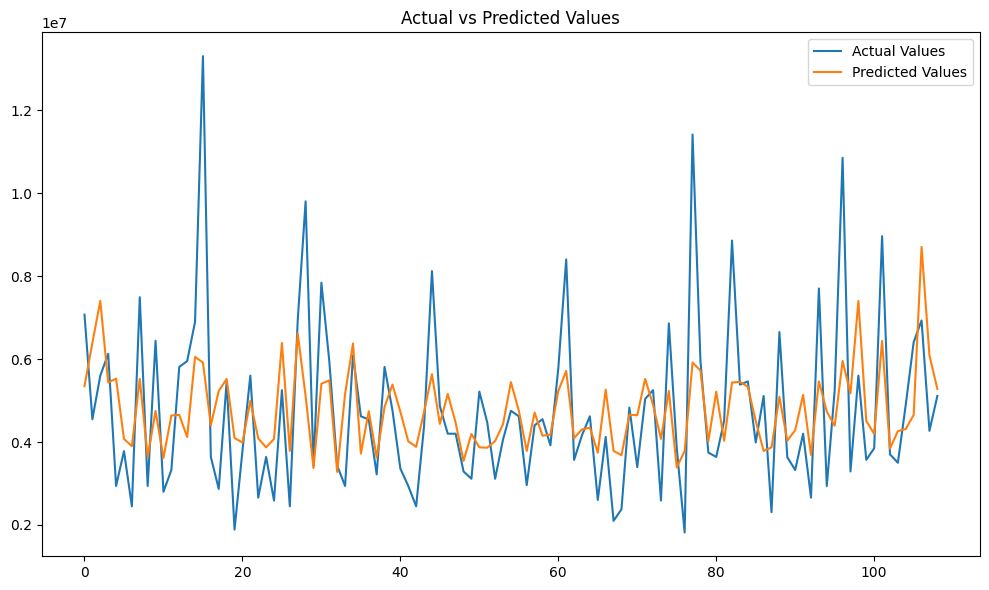

In [56]:

sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)

# Implementing a multiple linear regression model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train_scale, y_train)
y_pred = multiple_lr.predict(X_test_scale)

# Printing the metrics of the model
print(f"Model Score {round(multiple_lr.score(X_test_scale, y_test) * 100, 2)}%")

# Plotting the Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Values")
plt.plot(y_pred, label="Predicted Values")
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.legend()
plt.show()

In [58]:
X = data.drop(columns=["price"]).values.reshape(-1, 12)
y = data["price"].values

Model Score 61.97%


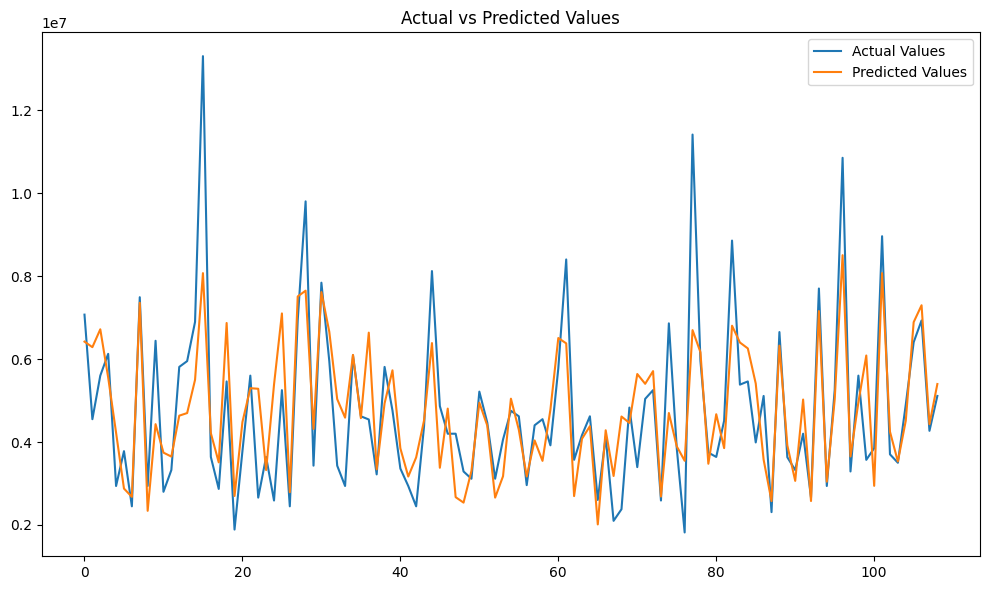

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)


multiple_lr = LinearRegression()
multiple_lr.fit(X_train_scale, y_train)
y_pred = multiple_lr.predict(X_test_scale)


print(f"Model Score {round(multiple_lr.score(X_test_scale, y_test) * 100, 2)}%")


plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Values")
plt.plot(y_pred, label="Predicted Values")
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.legend()
plt.show()